Machine Learning and Natural Language Processing
# 1. Machine Learning
# 1.2  Practical Task: Learning as a Search

# 1.2.1

In [1]:
# Define the function
import numpy as np
def f(z):
  x, y = z
  return 25 * (y + x**2)**2 + (1 + x)**2

In [2]:
# Ref: “Scipy.optimize.minimize — SciPy V1.9.3 Manual.” 2019. SciPy Documentation. SciPy documentation. October 19, 2019. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize.

from scipy import optimize

# Finding the local minimum
initial_guess = [0.98, 0.43]
result = optimize.minimize(f, initial_guess)

if result.success:
    fitted_params = result.x
    print(fitted_params)

[-0.99999755 -0.999995  ]


In [3]:
# Ref: “Scipy.optimize.brute — SciPy V1.9.3 Manual.” 2019. SciPy Documentation. SciPy documentation. October 19, 2019. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brute.html#scipy.optimize.brute.

# Define the function for getting the global minimum
def global_minima():

  # Finding the global minimum
  range = [-1.5,1.5],[-1.5,1.5]
  result = optimize.brute(f, range)
  print(result)

global_minima()

[-0.9999973  -0.99999731]


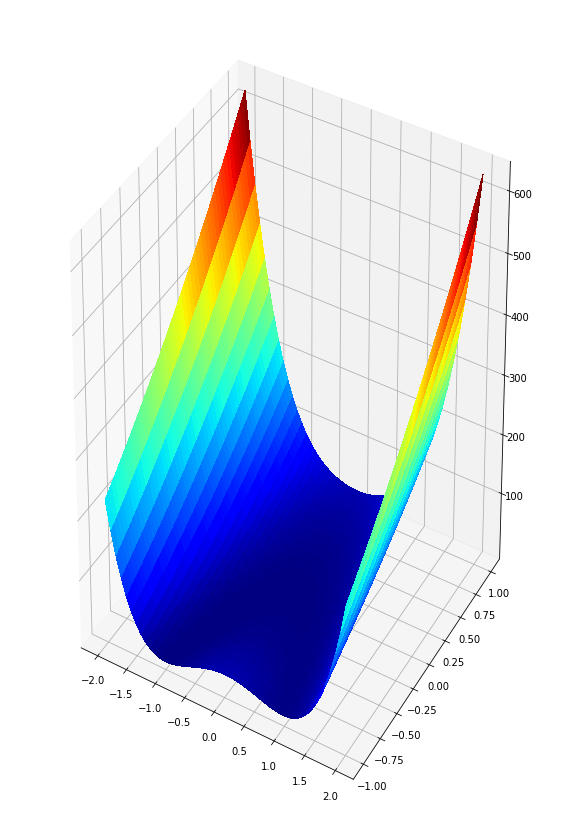

In [4]:
# Ref: Nair, Snehal. 2022. “Descent Carefully on a Gradient!” Medium, June 10, 2022. https://python.plainenglish.io/descent-carefully-on-your-gradient-c0f030ddef81.

import matplotlib.pyplot as plt

# Make a grid to evaluate the function (for plotting)
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

# Make 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,15.15))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(xg, yg, f([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

# 1.2.2

In [5]:
# Ref: Brownlee, J. 2021. “Simple Genetic Algorithm from Scratch in Python.” Machine Learning Mastery. March 2, 2021. https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/.

from numpy.random import randint
from numpy.random import rand
import time

# objective function
def objective(z):
  x, y = z
  return 25 * (y + x**2)**2 + (1 + x)**2

# tournament selection
def selection(pop, scores, k=3):
    
    # first random selection
    first_sel = randint(len(pop))
    for sel in randint(0, len(pop), k-1):
        
        # tournament performance
        if scores[sel] < scores[first_sel]:
            first_sel = sel
    return pop[first_sel]

# decode bitstring to numbers
def decode(bounds, n_bits, bitstring):
    decoded = list()
    largest = 2**n_bits
    for i in range(len(bounds)):
        
        # substring extraction
        start, end = i * n_bits, (i * n_bits)+n_bits
        substring = bitstring[start:end]
        
        # convert bitstring to a string of chars
        chars = ''.join([str(s) for s in substring])
        integer = int(chars, 2)
        
        # scale integer to desired range
        value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0])
        
        # store
        decoded.append(value)
    return decoded

# mutation operator
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        if rand() < r_mut:
            bitstring[i] = 1 - bitstring[i]

# crossover two parents to create two children
def crossover(p1, p2, r_cross):
    
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    
    # check for recombination
    if rand() < r_cross:
        
        # select crossover point that is not on the end of the string
        pt = randint(1, len(p1)-2)
        
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

# genetic algorithm
start = time.time()
def genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
    # initial population of random bitstring
    pop = [randint(0, 2, n_bits*len(bounds)).tolist() for _ in range(n_pop)]
    
    # keep track of best solution
    best, best_eval = 0, objective(decode(bounds, n_bits, pop[0]))
    
    # enumerate generations
    for gen in range(n_iter):
        
        # decode population
        decoded = [decode(bounds, n_bits, p) for p in pop]
        
        # evaluate all candidates in the population
        scores = [objective(d) for d in decoded]
        
        # check for new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %f" % (gen,  decoded[i], scores[i]))

        # select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]
        
        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):

            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                
                # mutation
                mutation(c, r_mut)
                
                # store for next generation
                children.append(c)
                
        # replace population
        pop = children
    return [best, best_eval]
end = time.time()

# define range for input
bounds = [[-5.0, 5.0], [-5.0, 5.0]]

# define the total generations
n_gen = 100

# bits per variable
n_bits = 16

# define the population size
n_pop = 10

# crossover rate
r_cross = 0.25

# mutation rate
r_mut = 0.05

# perform the genetic algorithm search
best, score = genetic_algorithm(objective, bounds, n_bits, n_gen, n_pop, r_cross, r_mut)
print('Completed!')
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))
print(f"Execution time: {end-start}s")

>0, new best f([-3.16253662109375, -3.7408447265625]) = 984.614837
>0, new best f([-2.2430419921875, -0.9490966796875]) = 418.141971
>0, new best f([1.627655029296875, -2.255401611328125]) = 10.782699
>2, new best f([1.622772216796875, -2.255401611328125]) = 10.450808
>3, new best f([-1.028594970703125, -1.005706787109375]) = 0.069202
>13, new best f([-0.937957763671875, -0.855712890625]) = 0.018312
>21, new best f([-1.028900146484375, -1.0369873046875]) = 0.012551
>22, new best f([-1.028594970703125, -1.07574462890625]) = 0.008683
>35, new best f([-1.045989990234375, -1.103973388671875]) = 0.004555
>48, new best f([-1.031951904296875, -1.071014404296875]) = 0.001948
>52, new best f([-1.031646728515625, -1.069793701171875]) = 0.001757
>55, new best f([-1.021881103515625, -1.04248046875]) = 0.000556
Completed!
f([-1.021881103515625, -1.04248046875]) = 0.000556
Execution time: 0.0003180503845214844s


# 1.2.3

In [6]:
# Ref: Stojiljković, M. 2021. “Stochastic Gradient Descent Algorithm with Python and NumPy.” Real Python. January 27, 2021. https://realpython.com/gradient-descent-algorithm-python/.

import time

# Creating a cost function calculator
start = time.time()
def cost_calc(theta, X, y):
  """Calculates the cost of X and y"""
  n = len(y)
  y_pred = X.dot(theta)
  cost = (1 / 2 * n) * np.sum(np.square(y_pred - y))
  return cost

# Creating a gradient descent function
def gradient_descent(X, y, theta, learn_rate=1e-6, n_iter=1000):
  """Finds the gradient descent of an objective function given the above parameters"""
  n = len(y)
  previous_cost = np.zeros(n_iter)
  previous_theta = np.zeros((n_iter, 2))
  for iter in range(n_iter):
    y_pred = np.dot(X, theta)
    theta = theta - (1 / n) * learn_rate * (X.T.dot((y_pred - y)))
    previous_theta[iter,:] = theta.T
    previous_cost[iter] = cost_calc(theta, X, y)
    return theta, previous_cost, previous_theta
end = time.time()

d = (2, 1)
y = np.zeros(d)
X = np.zeros(d)
learn_rate = 1e-6
n_iter = 1000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
theta, previous_cost, previous_theta = gradient_descent(X_b, y, theta, learn_rate, n_iter)

print("Theta0: {:0.4f} \nTheta1: {:0.4f}".format(theta[0][0], theta[1][0]))
print(f"Execution time: {end-start}s")

Theta0: -0.3655 
Theta1: -0.0132
Execution time: 0.0007634162902832031s
